# <center> <div style="width: 370px;"> ![numpy title](pictures/numpy_tytle.jpg)

<h1 align="center">Memory Management in NumPy</h1>

## Intro to Memory Management

**Before we dive into NumPy, it’s crucial to understand how computers manages memory.**

Imagine a computer's memory as an empty book awaiting short stories. The book's pages are blank at the start, symbolizing available memory space. As different authors (representing applications or processes) arrive, they seek their own space within the book's pages.
To avoid conflicts, these authors must coordinate with the book's manager, who allocates specific pages for each author. Over time, some stories become irrelevant, much like forgotten tales in the book. When no one reads or references these stories, they are removed to make room for new ones. This process resembles a garbage collector tidying up the book.
In essence, computer memory parallels an empty book, where fixed-length contiguous blocks of memory are like its pages.
Memory management involves the process of reading and writing data in applications. A memory manager plays the crucial role of determining where to place an application's data within the finite memory space, a process known as memory allocation.
Conversely, when data is no longer needed, it can be deleted or freed. But where does this "memory" come from?
Inside your computer, a physical device stores data while running programs. Multiple layers of abstraction exist between your Python code and the hardware. The operating system (OS) sits above the hardware, processing requests to read and write memory.
Further above, applications, including the default Python implementation, handle memory management. This article explores the algorithms and structures employed by the Python application for memory management.
Let's focus on the default Python implementation, CPython. Surprisingly, CPython is written in the C programming language, serving as both a code interpreter and an executor on a virtual machine.
Python operates as an interpreted language, transforming Python code into bytecode, which gets interpreted by a virtual machine when running your code. If you've come across .pyc files or `__pycache__` folders, they contain the bytecode interpreted by the virtual machine.
It's important to note that besides `CPython`, there are other Python implementations like `IronPython`, `Jython`, and `PyPy`.
To understand Python's memory management, it's essential to grasp the fundamentals of CPython. Despite C's limited support for object-oriented programming, CPython treats everything in Python as an object. Each object in CPython relies on a struct called a PyObject.
This PyObject, the backbone of Python objects, has two components:

1. **ob_refcnt:** A reference count used for garbage collection.
2. **ob_type:** A pointer to the object's type, defining its characteristics.

Each Python object has its memory allocator and deallocator, responsible for allocating and freeing memory as needed.
However, an essential consideration in memory management is that memory is a shared resource in a computer. Concurrent attempts by different processes to write to the same memory location can lead to undesirable consequences.

### NumPy’s Role in Memory Management 

NumPy is a powerful library for numerical computations in Python. It provides an array object that is up to 50x faster than traditional Python lists. This speed is due to the internal optimizations in NumPy, one of which is its memory management.
NumPy arrays are stored in a contiguous block of memory, unlike Python lists. This means that all elements of the array are stored next to each other in memory, which allows for faster access and operations.
When you create a very large NumPy array, it doesn’t throw a memory error because it uses a technique called memory mapping.

### Memory Mapping with NumPy

Memory mapping is a method that allows a program to use more memory than what is physically available on your machine. It does this by creating a ‘map’ between a disk file and the memory. This map acts as a cache for the data stored on the disk.
When you create a very large NumPy array, instead of storing the entire array in memory, NumPy creates a memory map and stores the array on disk. This allows you to work with arrays larger than your machine’s memory.
To create a memory-mapped array, you can use the `numpy.memmap` function. Here’s an example:

In [1]:
import numpy as np

In [2]:
# Create a memory-mapped array and initialize it with zeros
large_array = np.memmap('large_array.dat',
                        dtype='float32',
                        mode='w+',
                        shape=(10000, 10000)
                       )

In [3]:
# Initialize with zeros
large_array[:] = np.random.rand(10000, 10000)  

In [4]:
large_array

memmap([[0.01897797, 0.41709578, 0.00262423, ..., 0.6209537 , 0.87336725,
         0.7445942 ],
        [0.42035276, 0.63977575, 0.5798491 , ..., 0.7200078 , 0.6183163 ,
         0.11023203],
        [0.32341477, 0.14885117, 0.2601995 , ..., 0.9040125 , 0.6356539 ,
         0.41146332],
        ...,
        [0.10718223, 0.49055314, 0.39380866, ..., 0.7717925 , 0.20798364,
         0.7730101 ],
        [0.3436252 , 0.08154535, 0.5164416 , ..., 0.01196378, 0.8672023 ,
         0.00249079],
        [0.8540558 , 0.02701333, 0.6641607 , ..., 0.18023962, 0.25932774,
         0.20604192]], dtype=float32)

### Internal Memory Layout of an ndarray


A 'ndarray' class instance represents a cohesive, one-dimensional segment of computer memory. This memory segment is either owned by the array itself or another object. It is accompanied by an indexing system that translates N integers into the precise location of an item within this memory block.

The permissible ranges for these indices are determined by the array's shape. The specifics of how many bytes each item occupies and the interpretation of these bytes are dictated by the data-type object linked to the array.

In [5]:
x = np.array([0, 1, 2, 3, 4, 5])

In [6]:
x.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

These are flags or attributes associated with NumPy arrays in Python, which provide information about various aspects of the array's memory layout and properties. Here's an explanation of each:

1. **C_CONTIGUOUS**: This flag indicates whether the array is C-contiguous, meaning its data is stored in memory in a C-like (row-major) order. In a C-contiguous array, elements in the same row are adjacent in memory. This is the default layout for NumPy arrays, and you can check this flag to determine if an array is stored in C-contiguous order.

2. **F_CONTIGUOUS**: The F-contiguous flag indicates whether the array is F-contiguous, following a Fortran-like (column-major) memory layout. In an F-contiguous array, elements in the same column are stored adjacent in memory. This layout is used by some other programming languages like Fortran, R, Julia, and MATLAB.

3. **OWNDATA**: This flag tells you whether the array owns its data or if it shares data with another array. If OWNDATA is True, the array has its own data; if False, it shares data with another array. It's important because modifying a shared data array can affect other arrays that share the same data.

4. **WRITEABLE**: WRITEABLE indicates whether the array is writeable or read-only. If WRITEABLE is True, you can modify the contents of the array. If it's False, the array is read-only, and any attempt to modify it will raise an error.

5. **ALIGNED**: The ALIGNED flag indicates whether the array data is properly aligned in memory for efficient access. If ALIGNED is True, it means the array is aligned; if False, it may not be optimally aligned. Proper alignment can improve performance when working with the array.

6. **WRITEBACKIFCOPY**: This flag is used in the context of creating views or copies of arrays. When WRITEBACKIFCOPY is True, it implies that a copy of the array was created, and modifications to this copy may be written back to the original array when the copy is deleted. It's typically used for memory-mapped arrays or when you create a copy of an array with a different data type.



In [7]:
c_array = np.random.rand(10000, 1000) 

In [8]:
f_array = np.asfortranarray(c_array) 

In [9]:
def sum_row(x):    
    return np.sum(x[0, :])

In [10]:
def sum_col(x):
    return np.sum(x[:, 0])

if we test the performance, we have:

In [11]:
%timeit sum_row(c_array)

2.47 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%timeit sum_row(f_array)

3.4 µs ± 414 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%timeit sum_col(c_array)

71.5 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit sum_col(f_array)

5.94 µs ± 893 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As we can see, summing up the row of a `C` array is much faster than summing up its column. This is because, in a `C` array, elements in a row are laid out in successive memory locations. The opposite is true for a Fortran array, where the elements of a column are laid out in consecutive memory locations.

This is an important distinction and allows you to suitably arrange your data in an array, depending on the kind of algorithm or operation you are performing. Knowing this distinction can help you speed up your code by orders of magnitude.

### Views and Copies

When working with NumPy arrays, there are two fundamental ways to access data: through copies and views. These two methods determine whether you directly access elements from the original array or create a separate copy of the array containing only the accessed elements.
A ***view*** is essentially a reference to the original array. In Python, variables are references, so when you modify a view, you are, in fact, modifying the original array. Conversely, a ***copy*** is a distinct array with its own memory space, and modifications to a copy do not affect the original array.
To discern whether two arrays are copies or views of each other, NumPy provides the `may_share_memory` function in its miscellaneous routines. While this function is reliable in most cases, it relies on heuristics and may occasionally yield inaccurate results. For introductory purposes, we will assume its reliability.
In practice, slicing an array typically creates a view, while indexing it generates a copy. Let's delve into these distinctions through a few illustrative code snippets. First, we will create a random `9x99` array for demonstration purposes.

In [15]:
x = np.random.rand(9, 99)

if extract the first 3 columns of the array and assign them to variable `y`:

In [16]:
y = x[:, :3]

In [17]:
np.may_share_memory(x, y)

True

As you can see `x` and `y` ***may*** have shared memory.
Now, if we modify the array `y`, see affects `x`. set all the elements of `y` to zero:

In [18]:
x[:, :3]

array([[0.98836233, 0.13912672, 0.36707162],
       [0.83774828, 0.49489622, 0.11479716],
       [0.25616877, 0.27211892, 0.45904872],
       [0.07999371, 0.3444876 , 0.78864417],
       [0.60795913, 0.55563961, 0.68654045],
       [0.07822455, 0.59545474, 0.75667895],
       [0.82895351, 0.75111266, 0.71877659],
       [0.15413075, 0.07084817, 0.63945433],
       [0.31179026, 0.78923352, 0.73698378]])

In [19]:
y[:] = 0.

In [20]:
x[:, :3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

 This is because `y` was just a view, a reference to `x`.

In the next we create a copy to see differences. In this alternative approach, we employ the same method as before (but for copy elements) to generate the x array using a random function. However, in this iteration, we take a different route for initializing the y array. We begin by using `numpy.empty` to create an empty array, and subsequently, we populate it with the values from x. As a result, y ceases to be a reference to x; instead, it becomes a distinct and independent array, albeit containing the same values as a subset of x. To confirm this transformation, let's once more utilize the `may_share_memory` function to ascertain that y is indeed a copy of x:

In [21]:
x = np.random.rand(9, 99)

In [22]:
y = np.empty([8, 3]) 

In [23]:
y[:] = x[:8, :3]

In [24]:
np.may_share_memory(x, y)

False

***alter the valiu in `y` and check whether the value of `x` changes as well:***

In [25]:
y[:] = 0

In [26]:
x[:8, :3]

array([[0.07575805, 0.89679058, 0.97974359],
       [0.28493419, 0.55612284, 0.69756472],
       [0.96624807, 0.97224952, 0.92912351],
       [0.28957506, 0.55358986, 0.377225  ],
       [0.66816083, 0.87931233, 0.06841157],
       [0.55830194, 0.99910953, 0.25892622],
       [0.69106984, 0.67013092, 0.09848187],
       [0.46858213, 0.44801985, 0.34229392]])

You should observe the previous code snippet displaying five rows of random numbers, as we initialized `x`. Consequently, altering the values of `y` to 0 did not have any impact on the contents of `x`.

### Intro to Strides


Strides serve as the indexing mechanism within NumPy arrays, dictating the number of bytes to advance in order to locate the next element. While we've already explored the performance enhancements of NumPy, which arise from its reliance on a uniform multidimensional array structure containing fixed-size elements (the `numpy.ndarray` object), we've primarily focused on aspects like shape (dimensions), data types, and ordering (whether it follows C-style row-major or Fortran-style column-major indexing). Now, let's delve deeper into the concept of strides.


#### Example

In [27]:
import numpy as np
import random

In [28]:
x = np.random.randint(0, 128, (4, 4), dtype=np.int8)

In [29]:
x.shape

(4, 4)

In [30]:
x

array([[108,   9, 122,  10],
       [ 50,  79,  96, 125],
       [ 72,  59,  22,  97],
       [ 95,  56,  84,  58]], dtype=int8)

In [31]:
x.data

In [32]:
x.strides

(4, 1)

It means that `4` steps should be taken for each `row` and `1` step should be taken for each `column`.
we can change shape and see that again:

In [33]:
x.shape = 8, 2

In [34]:
x.strides

(2, 1)

In [35]:
x

array([[108,   9],
       [122,  10],
       [ 50,  79],
       [ 96, 125],
       [ 72,  59],
       [ 22,  97],
       [ 95,  56],
       [ 84,  58]], dtype=int8)

In [36]:
x.data

we can also change the dimensions:

In [37]:
x.shape = 16, 1, 1

In [38]:
x.strides

(1, 1, 1)

In [39]:
x

array([[[108]],

       [[  9]],

       [[122]],

       [[ 10]],

       [[ 50]],

       [[ 79]],

       [[ 96]],

       [[125]],

       [[ 72]],

       [[ 59]],

       [[ 22]],

       [[ 97]],

       [[ 95]],

       [[ 56]],

       [[ 84]],

       [[ 58]]], dtype=int8)

In [40]:
x.data

as we can see that the memory layout of the data remains the same, but only the strides change.

### How can the stride improve our NumPy experience?


So now we know what a stride is, and its relationship to an ndarray object, but how can the stride improve our NumPy experience? Let's do some stride manipulation to get a better sense of this: two arrays are with same content but have different strides:


In [41]:
x = np.ones((10000, )) 

In [42]:
y = np.ones((10000 * 100, ))[::100] 

In [43]:
x.shape, y.shape

((10000,), (10000,))

In [44]:
(x == y).all()

True

We create two NumPy Arrays, `x` and `y`, and do a comparison; we can see that the two arrays are equal. They have the same shape and all the elements are one, but actually the two arrays are different in terms of memory layout. Let's simply use the flags attribute to check the two arrays' memory layout.

In [45]:
x.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [46]:
y.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

We can see that the `x` array is continuous in both the C and Fortran order while `y` is not. Let's check the strides for the difference:

In [47]:
x.strides, y.strides

((8,), (800,))

Array `x` is created continuously, so in the same dimension each element is eight bytes apart (the default `dtype` of `numpy.ones` is a 64-bit float); however, `y` is created from a subset of 10000 * 100 for every 100 elements, so the index schema in the memory layout is not continuous.

Even though `x` and `y` have the same shape, each element in `y` is 800 bytes apart from each other. When you use NumPy arrays `x` and `y`, you might not notice the difference in indexing, but the memory layout does affect the performance. Let's use the `%timeit` to check this out:

In [48]:
%timeit x.sum()

4.52 µs ± 196 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [49]:
%timeit y.sum()

8.79 µs ± 766 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Typically with a fixed cache size, when the stride size gets larger, the hit rate (the fraction of memory accessed that finds data in the cache) will be lower, comparatively, while the miss rate (the fraction of memory accessed that has to go to the memory) will be higher. The cache hit time and miss time compose the average data access time. Let's try to look at our example again from the cache perspective. Array `x` with smaller strides is faster than the larger strides of `y`. The reason for the difference in performance is that the CPU is pulling data from the main memory to its cache in blocks, and the smaller stride means fewer transfers are needed. See the following graph for details, where the red line represents the size of the CPU cache, and blue boxes represent the memory layout containing the data.

It's obvious that if `x` and `y` are both required, 100 blue boxes of data, the required cache time for `x` will be less.

# <center> <div style="width: 700px;"> 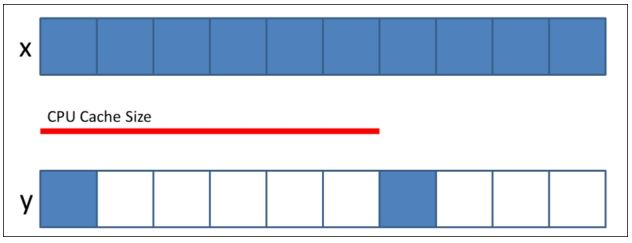

### Stride in N-dimensional `ndarray`

A segment of memory is inherently 1-dimensional, and there are many different schemes for arranging the items of an N-dimensional array in a 1-dimensional block. NumPy is flexible, and ndarray objects can accommodate any strided indexing scheme. In a strided scheme, the N-dimensional index $(`n_0, n_1, ..., n_{N-1}`)$ corresponds to the offset (in bytes):

$$n_{\text{offset}} = \sum_{k=0}^{N-1} s_k n_k$$

from the beginning of the memory block associated with the array. Here, $s_k$ are integers which specify the strides of the array.

In [50]:
import numpy as np

In [51]:
x = np.random.rand(3, 4)

In [52]:
x.itemsize, x.nbytes / x.shape[0]

(8, 32.0)

In [53]:
x.strides

(32, 8)

In [54]:
# .flatten() returns numpy array
x.flatten()

array([0.5988397 , 0.36368215, 0.64372507, 0.90114128, 0.21142683,
       0.82963352, 0.99683143, 0.82450406, 0.67529549, 0.60012722,
       0.74184872, 0.06982166])

In [55]:
# .flat returns iterator
np.array(x.flat)

array([0.5988397 , 0.36368215, 0.64372507, 0.90114128, 0.21142683,
       0.82963352, 0.99683143, 0.82450406, 0.67529549, 0.60012722,
       0.74184872, 0.06982166])

In [56]:
# a stride of 1 is equal to 32 bytes
x[1]

array([0.21142683, 0.82963352, 0.99683143, 0.82450406])

## Why `np.array` not `list`

In [57]:
x = [1, '2', [1, 2, 3]]
arr = np.array([1, 2, 3])

list: more memory is needed
      homogenous memory in numpy results in more speed  -> different data types
      c_array f_array  ---->  which operations are slow which are fast? which axes?
      default is memory view in numpy -----> no copy
      debug ---> flags, strides, data, (under the hood information)
      
      vectorization --> beutiy, no foor loop, formula == code
      broadcasting --> no broadcasting in python